In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('/content/in.csv', low_memory = False)
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [7]:
df.tail(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
30698,17955841,Luxurious Townhouse in Williamsburg,79875204125,verified,Pascal-Louis,Brooklyn,Williamsburg,40.71339,-73.94873,United States,...,120.0,5.0,2.0,2019-01-01,0.13,3.0,2.0,178.0,No Smoking. Pets Allowed with fee.,NaN
30699,17956394,Bright & spacious room in Brooklyn sanctuary,91020207700,unconfirmed,Anna,Brooklyn,East Flatbush,40.63621,-73.94968,United States,...,206.0,3.0,1.0,2018-03-18,0.06,2.0,NaN,NaN,NaN,NaN


In [8]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10313 entries, 0 to 10312
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10313 non-null  int64  
 1   NAME                            10244 non-null  object 
 2   host id                         10313 non-null  int64  
 3   host_identity_verified          10218 non-null  object 
 4   host name                       10285 non-null  object 
 5   neighbourhood group             10286 non-null  object 
 6   neighbourhood                   10297 non-null  object 
 7   lat                             10305 non-null  float64
 8   long                            10305 non-null  float64
 9   country                         10263 non-null  object 
 10  country code                    10234 non-null  object 
 11  instant_bookable                10234 non-null  float64
 12  cancellation_policy             

In [9]:
df.duplicated().value_counts()

,count
False,10313


In [10]:
df[df['neighbourhood group'] == 'Brooklyn']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,14.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,...,NaN,2.0,148.0,2019-06-29,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10302,6691131,Bedroom in Williamsburg's Heart,17962832176,verified,Baptiste,Brooklyn,Williamsburg,40.71413,-73.95044,United States,...,144.0,2.0,3.0,2015-08-31,0.06,2.0,1.0,392.0,Check In/ Check Out: Flexible regarding to che...,NaN
10304,6692235,NaN,84121768078,verified,John,Brooklyn,Williamsburg,40.71636,-73.96246,United States,...,148.0,2.0,97.0,2019-06-18,2.13,3.0,8.0,226.0,Be courteous to neighbors. No parties. No smok...,NaN
10306,6693340,Large sunny room close to N&D train LGBTQ frie...,90133573582,verified,Jacob,Brooklyn,Bensonhurst,40.61391,-73.99128,United States,...,167.0,2.0,2.0,2019-06-22,0.22,2.0,2.0,252.0,NaN,NaN
10307,6693892,"BIG SUNNY 2 1/2 BR, 1 STOP FR. NYC",26599536615,unconfirmed,Charlotta,Brooklyn,Fort Greene,40.69230,-73.97123,United States,...,93.0,3.0,66.0,2019-05-27,1.41,1.0,2.0,259.0,"This is our home, please be respectful, we onl...",NaN


In [16]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


In [19]:
print(df.columns)


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price_$', 'service_fee_$', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [22]:
# Drop house_rules and license columns if they exist
df.drop_duplicates(inplace=True)
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Since price_$ and service_fee_$ already exist, just clean them
df['price_$'] = df['price_$'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(str).str.replace('[$,]', '', regex=True).astype(float)

# Drop all records with missing values
df.dropna(inplace=True)

# Convert other data types
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['construction_year'] = df['construction_year'].astype(int)

# Correct spelling of 'brookln'
df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'brooklyn'

# Remove outliers in 'availability_365'
df = df[df['availability_365'] <= 365]


In [23]:
df.duplicated().value_counts()

,count
False,7166


In [24]:
df.describe()

,lat,long,instant_bookable,construction_year,price_$,service_fee_$,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166,7166.000000,7166.000000,7166.000000,7166.000000
mean,40.728538,-73.958070,0.491208,2012.452414,619.340636,123.870779,8.051075,49.646525,2018-03-17 21:44:21.568517888,0.869750,3.012280,2.695507,178.542143
min,40.508680,-74.239860,0.000000,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687960,-73.983487,0.000000,2008.000000,323.000000,65.000000,2.000000,5.000000,2016-11-05 00:00:00,0.110000,2.000000,1.000000,85.000000
50%,40.721665,-73.958540,0.000000,2012.000000,619.000000,124.000000,3.000000,19.000000,2019-01-04 00:00:00,0.360000,3.000000,1.000000,180.000000
75%,40.763795,-73.942270,1.000000,2017.000000,913.000000,183.000000,5.000000,66.000000,2019-06-17 00:00:00,1.190000,4.000000,2.000000,272.000000
max,40.908040,-73.729010,1.000000,2022.000000,1200.000000,240.000000,1250.000000,607.000000,2022-05-21 00:00:00,13.450000,5.000000,121.000000,365.000000
std,0.052608,0.037102,0.499958,5.752214,336.711489,67.345637,27.038726,69.084573,NaN,1.163349,1.426639,6.879276,108.439517


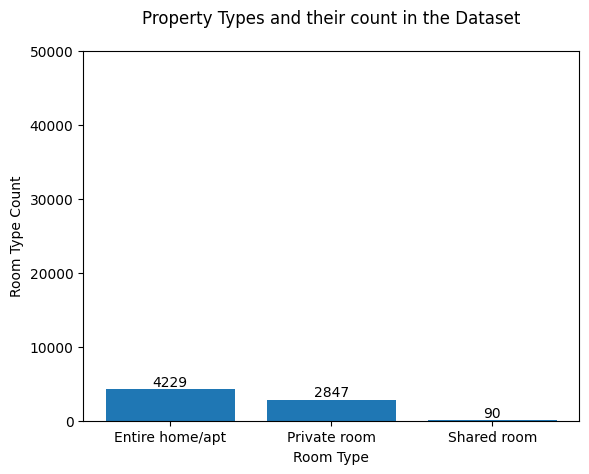

In [28]:
import matplotlib.pyplot as plt

# Calculate counts of each room type
property_types = df['room_type'].value_counts().reset_index()
property_types.columns = ['room_type', 'count']

# Plot the bar chart
room_type_bar = plt.bar(property_types['room_type'], property_types['count'])

plt.bar_label(room_type_bar, labels=property_types['count'])
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset', pad=20)
plt.show()


In [35]:
# Calculate counts for each neighborhood group
hood_group = df['neighbourhood_group'].value_counts().reset_index()
hood_group

,neighbourhood_group,count
0,Brooklyn,3237
1,Manhattan,3217
2,Queens,574
3,Bronx,104
4,Staten Island,33
5,brooklyn,1


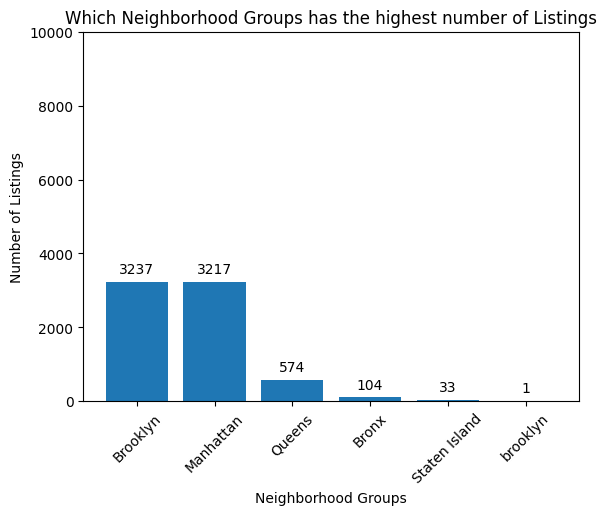

In [36]:
import matplotlib.pyplot as plt

# Plot the bar chart
hood_group_bar = plt.bar(hood_group['neighbourhood_group'], hood_group['count'])

plt.bar_label(hood_group_bar, labels=hood_group['count'], padding=4)
plt.ylim([0, 10000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Groups has the highest number of Listings')
plt.show()


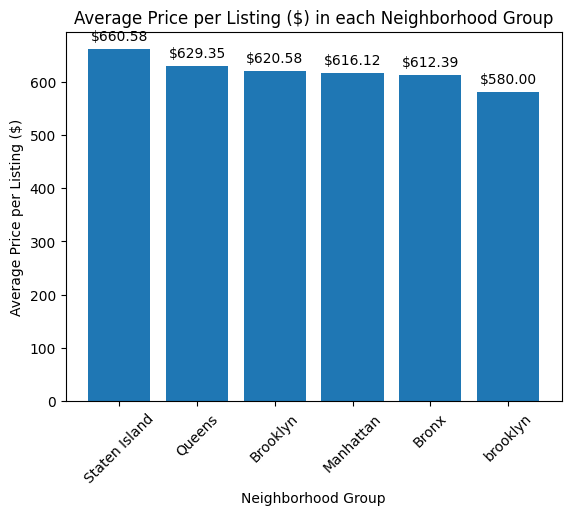

In [38]:
import matplotlib.pyplot as plt

# Compute average price per neighborhood group
avg_price = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Plot the bar chart
avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'])
plt.bar_label(avg_price_bar, labels=[f"${x:.2f}" for x in avg_price['price_$']], padding=4)

plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing ($) in each Neighborhood Group')
plt.show()


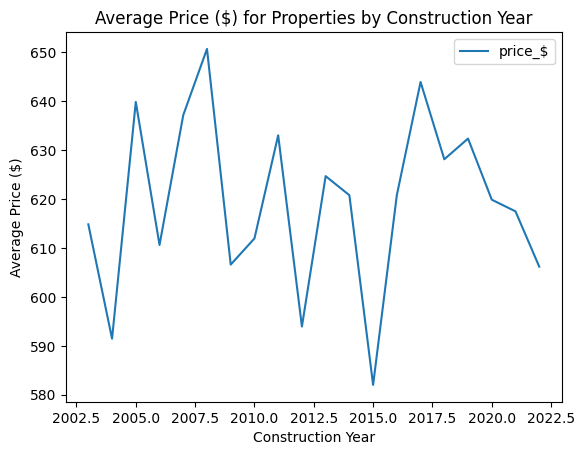

In [40]:
import matplotlib.pyplot as plt

# Group by construction year and get average price
df.groupby('construction_year')['price_$'].mean().to_frame().plot(kind='line')

plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties by Construction Year')
plt.show()


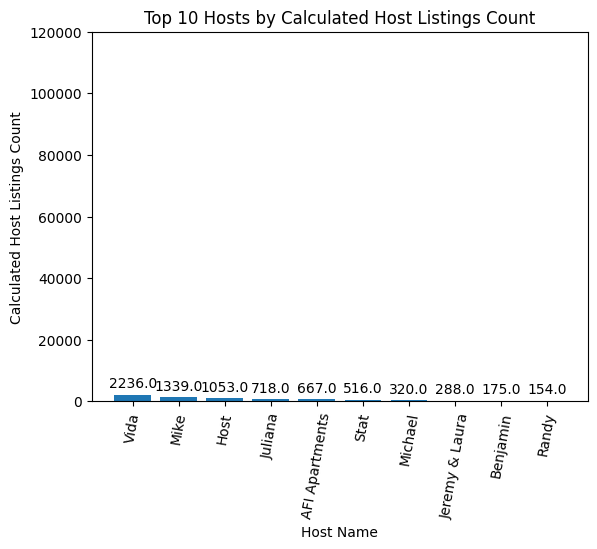

In [42]:
import matplotlib.pyplot as plt

# Top 10 hosts by calculated host listings count
hosts = df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

# Plot bar chart
hosts_bar = plt.bar(hosts.index, hosts['calculated_host_listings_count'])
plt.bar_label(hosts_bar, labels=hosts['calculated_host_listings_count'], padding=3)
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim(0, 120000)
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()


In [46]:
# Average review rate by host verification status
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()
review

,review_rate_number
host_identity_verified,
unconfirmed,3.019183
verified,3.005324


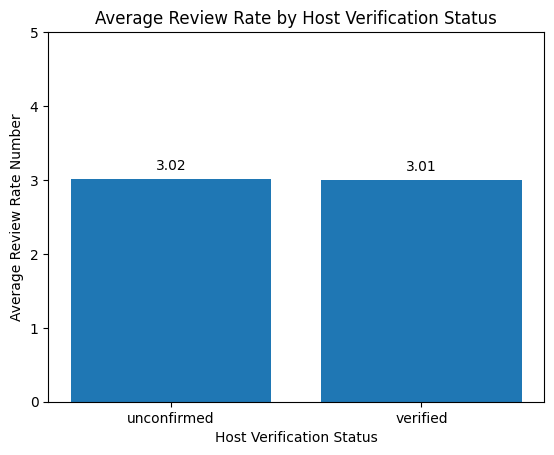

In [44]:
import matplotlib.pyplot as plt

# Plot bar chart
review_bar = plt.bar(review.index, review['review_rate_number'])
plt.bar_label(review_bar, labels=[round(x, 2) for x in review['review_rate_number']], padding=4)
plt.ylim([0, 5])  # assuming review ratings are on a 0-5 scale
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate by Host Verification Status')
plt.show()


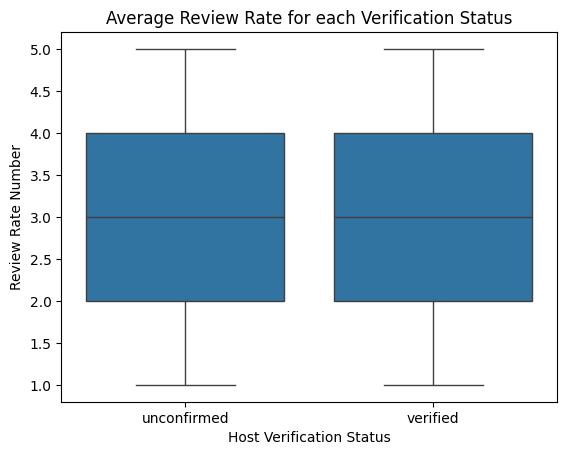

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

base_color = sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review_rate_number", color=base_color)

plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')
plt.show()


In [50]:
# Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999913206097762)

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of the Price of a Listing and Its Service Fee')

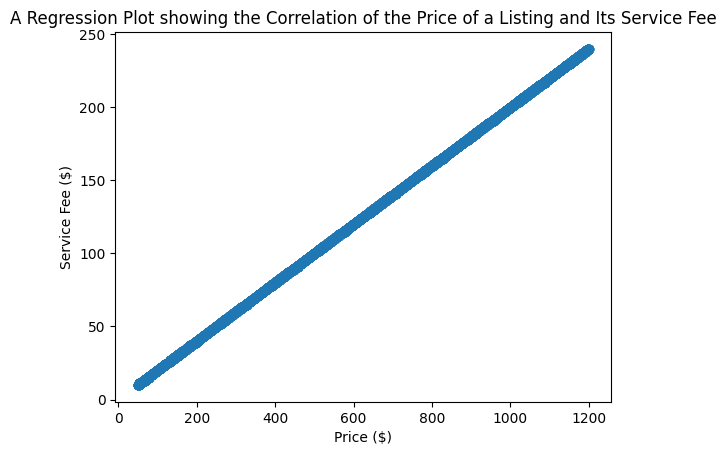

In [49]:


sns.regplot(data=df, x='price_$', y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and Its Service Fee')

In [52]:
# Average review rate by neighborhood group and room type
avg = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame()
avg = avg.reset_index()

# Display the result
print(avg)


   neighbourhood_group        room_type  review_rate_number
0                Bronx  Entire home/apt            2.885714
1                Bronx     Private room            3.076923
2                Bronx      Shared room            2.000000
3             Brooklyn  Entire home/apt            2.986207
4             Brooklyn     Private room            3.089057
5             Brooklyn      Shared room            2.740741
6            Manhattan  Entire home/apt            3.009833
7            Manhattan     Private room            3.012357
8            Manhattan      Shared room            3.040000
9               Queens  Entire home/apt            2.844358
10              Queens     Private room            3.038961
11              Queens      Shared room            3.444444
12       Staten Island  Entire home/apt            3.055556
13       Staten Island     Private room            2.466667
14            brooklyn     Private room            4.000000


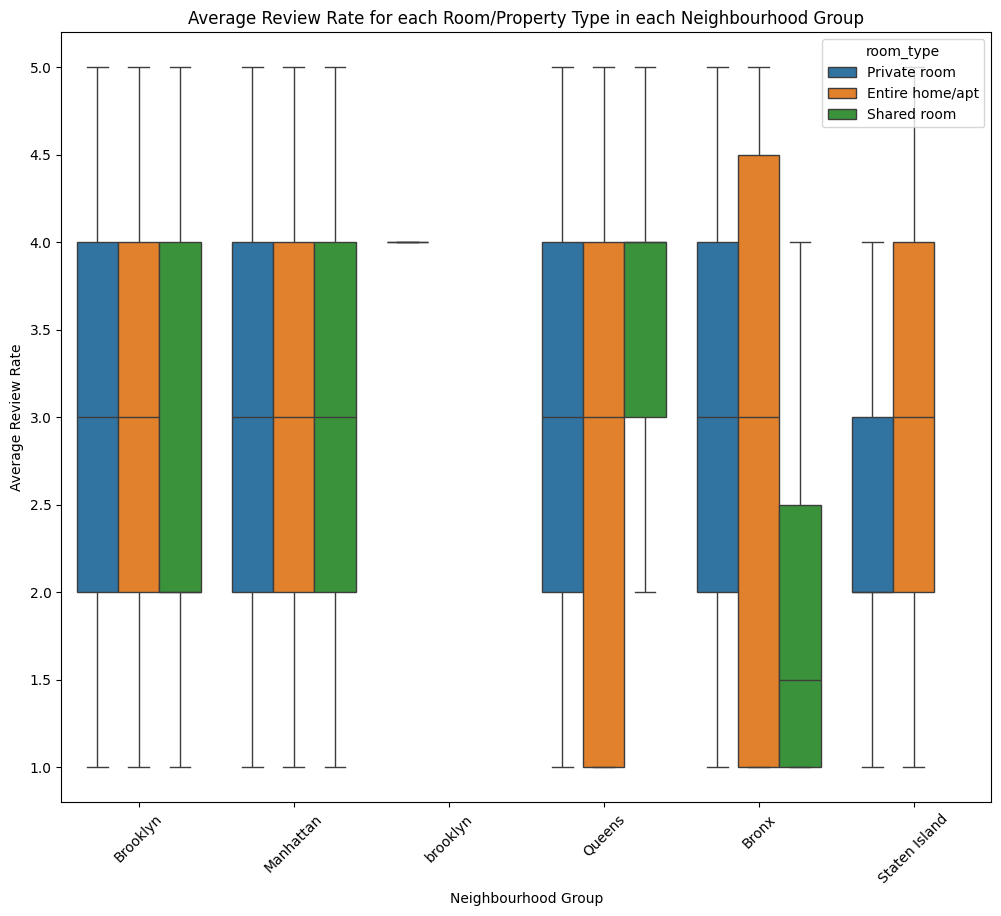

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="neighbourhood_group", y="review_rate_number", hue="room_type")

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()


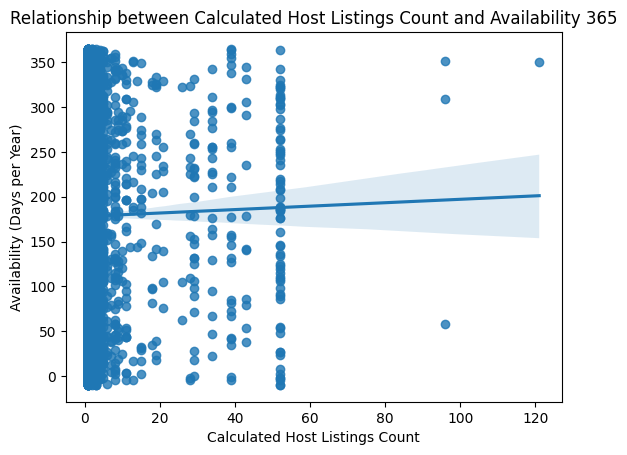

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x='calculated_host_listings_count', y='availability_365')

plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (Days per Year)')
plt.title('Relationship between Calculated Host Listings Count and Availability 365')
plt.show()


In [65]:
df['calculated_host_listings_count'].corr(df['availability_365'])


np.float64(0.01214633070392276)

In [14]:
#Data Types
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [19]:
# Null Values
df.isnull()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
30696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
30697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
30698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
df.isnull().sum()

,0
id,0
NAME,107
host id,0
host_identity_verified,158
host name,224
neighbourhood group,27
neighbourhood,16
lat,8
long,8
country,87


In [21]:
df.isnull().sum().sum()

np.int64(53937)

In [26]:
# Check columns
df.columns

# Unique values per column
df.nunique()

# Sample data
df.sample(5)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
17432,10629030,Nice room w private bathroom in Bedstuy/Bushwick,34015568790,unconfirmed,Fred,Brooklyn,Bedford-Stuyvesant,40.68742,-73.92212,United States,...,82.0,1.0,4.0,2018-05-13,0.15,5.0,3.0,0.0,Please remember that this is a residential bui...,NaN
10490,6794963,Williamsburg/Billburg/The Burg,79036393104,unconfirmed,Erin,Brooklyn,Williamsburg,40.71848,-73.95834,United States,...,140.0,4.0,54.0,2019-06-22,1.17,3.0,1.0,376.0,We except you to clean up after yourself and g...,NaN
6960,4845344,Sun-Filled Room near Central Park,86279570036,verified,Marco,Manhattan,East Harlem,40.79492,-73.94087,United States,...,34.0,4.0,79.0,2019-06-29,2.06,1.0,2.0,157.0,Female first please. Please keep the space qui...,NaN
1326,1733686,Beautiful Fresh Studio for Sublet,992978391,verified,Dana,Brooklyn,Clinton Hill,40.68232,-73.96501,United States,...,59.0,30.0,63.0,2019-05-26,0.75,4.0,1.0,259.0,NaN,NaN
27760,16333184,Mid-town West 5-min walk to Central Park,67424569861,verified,Jen,Manhattan,Upper West Side,40.76814,-73.98404,United States,...,79.0,5.0,2.0,2018-09-06,0.10,2.0,1.0,0.0,1. No wearing shoes inside the house. We will ...,NaN


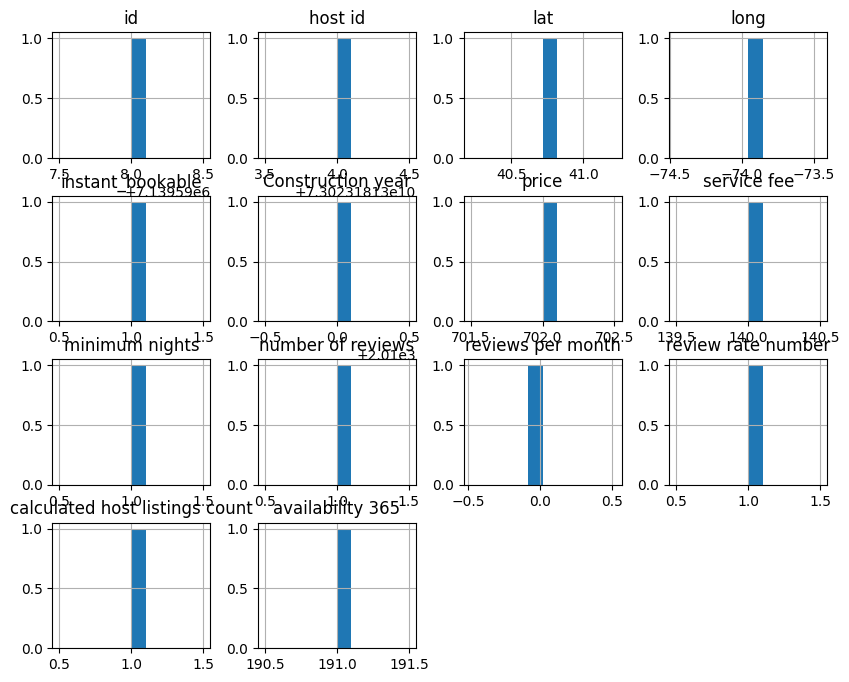

In [29]:
df.hist(figsize=(10,8))
plt.show()


In [33]:
df.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

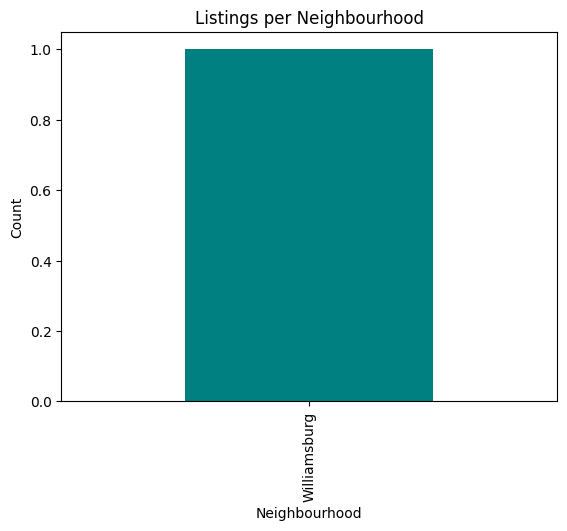

In [35]:
df['neighbourhood'].value_counts().plot(kind='bar', color='teal')
plt.title('Listings per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


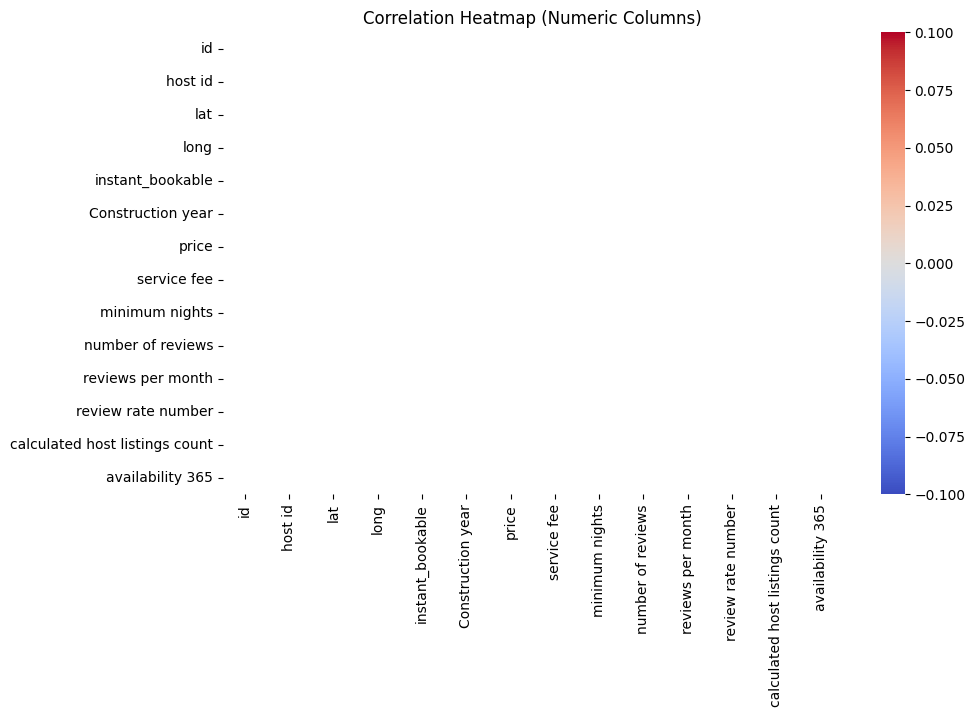

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()


In [38]:
# 1. View column names
print(df.columns)

# 2. View numeric and categorical columns
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
Index(['id', 'host id', 'lat', 'long', 'instant_bookable', 'Construction year',
       'price', 'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')
Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'cancellation_policy',
       'room type', 'last review', 'house_rules', 'license'],
      d

In [40]:
# Basic info
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (1, 26)
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1 non-null      int64  
 1   NAME                            1 non-null      object 
 2   host id                         1 non-null      int64  
 3   host_identity_verified          1 non-null      object 
 4   host name                       1 non-null      object 
 5   neighbourhood group             1 non-null      object 
 6   neighbourhood                   1 non-null      object 
 7   lat                             1 non-null      float64
 8   long                            1 non-null      float64
 9   country                         1 non-null      object 
 10  country code                    1 non-null      object 
 11  instant_bookable                1 non-null      float64
 12  cancellation_policy   

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.0,1.000000e+00,1.00000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
mean,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,0.02,1.0,1.0,191.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,0.02,1.0,1.0,191.0
25%,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,0.02,1.0,1.0,191.0
50%,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,0.02,1.0,1.0,191.0
75%,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,0.02,1.0,1.0,191.0
max,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,0.02,1.0,1.0,191.0


In [44]:
for col in df.columns:
    print(repr(col))


'id'
'NAME'
'host id'
'host_identity_verified'
'host name'
'neighbourhood group'
'neighbourhood'
'lat'
'long'
'country'
'country code'
'instant_bookable'
'cancellation_policy'
'room type'
'Construction year'
'price'
'service fee'
'minimum nights'
'number of reviews'
'last review'
'reviews per month'
'review rate number'
'calculated host listings count'
'availability 365'
'house_rules'
'license'


In [46]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

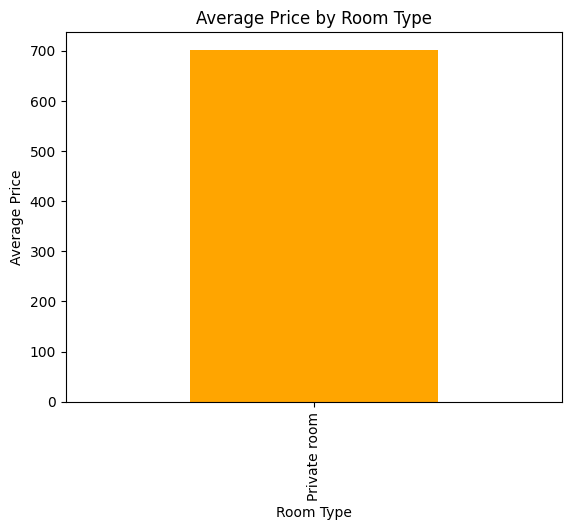

In [49]:
# Average price by room type
avg_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', color='orange')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


